**Import packages**

In [1]:
!pip install pytictoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
from sklearn.model_selection import train_test_split
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 3s 0us/step


((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

**Create helper functions**

In [4]:
def plot_sample_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    plt.xlabel('Image Label: {}'.format(classes[y[index]]))

def classification_results(X_test,y_test,y_pred_classes):
  from sklearn.metrics import confusion_matrix , classification_report
  import seaborn as sn

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(y_test, y_pred_classes))

def plot_fitting_history(history,filename,dpi):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  if epochs <= 60: plt.xticks(np.arange(0, epochs + 1, step=5))
  else: plt.xticks(np.arange(0, epochs + 1, step=20))
  if 'val_loss' in history.history.keys():
    plt.plot(epoch_data,history.history['val_loss'],'o--')
    plt.legend(['Training','Validation'])
  else:
    plt.legend(['Training'])
  plt.savefig(filename, dpi=dpi)
  plt.show()

**Plot sample image**

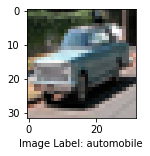

In [5]:
plot_sample_image(X_train, y_train, np.random.randint(100))

# CNN (convolutional neuaral network) Classifier

In [7]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Network architecture
C_CNN = models.Sequential([

    layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax'),
])

C_CNN.summary()

# Data Augmentation
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,
                                                    random_state=42, stratify=y_train)

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True)
datagen.fit(X_train)

# validationgen = ImageDataGenerator(
#     rescale=1./255)
# validationgen.fit(X_val)
X_val = X_val/255.0

# Compilation
learning_rate =  0.0001
C_CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Training
t_CNN = TicToc()
t_CNN.tic()
early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history_C_CNN = C_CNN.fit(datagen.flow(X_train, y_train, batch_size=32), 
                          steps_per_epoch=len(X_train) / 32, epochs=200,
                          validation_data=(X_val, y_val), callbacks = early_callbacks, verbose=1)

t_CNN.toc()

print(f"\n\nMaximum Validation Accuracy: {round(np.max(history_C_CNN.history['val_accuracy'])*100,2)}%")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 batch_normalization_13 (Bat  (None, 30, 30, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                      

**Check testing accuracy**

In [8]:
(_, _), (X_test,y_test) = datasets.cifar10.load_data()
X_test = X_test/255.0
y_test = y_test.reshape(-1,)
C_CNN.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3970 - accuracy: 0.8739


[0.39703214168548584, 0.8738999962806702]

**Plot training and validation loss**

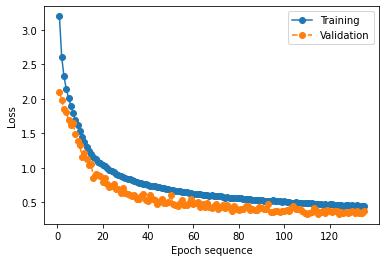

In [9]:
filename = 'Training history CIFAR10 [CNN]'+'.png'
plot_fitting_history(history_C_CNN, filename, dpi = 100)

**Report classification performance & plot confusion matrix**

313/313 [==============================] - 2s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.91      0.96      0.94      1000
           2       0.85      0.83      0.84      1000
           3       0.82      0.70      0.76      1000
           4       0.87      0.91      0.89      1000
           5       0.93      0.68      0.78      1000
           6       0.81      0.97      0.88      1000
           7       0.89      0.93      0.91      1000
           8       0.93      0.92      0.92      1000
           9       0.86      0.94      0.90      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



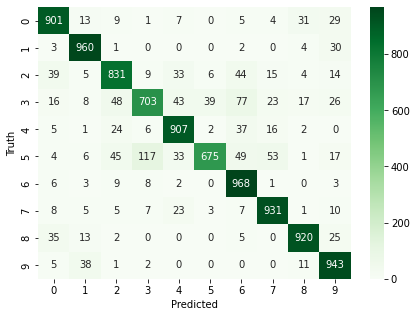

In [10]:
y_pred = C_CNN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes) 

**Save the trained model**

In [11]:
C_CNN.save('CNN_CIFAR10.h5')

**Load the saved model**

In [12]:
from keras.models import load_model
CNN_CIFAR10 = load_model('CNN_CIFAR10.h5')

In [13]:
CNN_CIFAR10.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3970 - accuracy: 0.8739


[0.39703214168548584, 0.8738999962806702]